<a href="https://www.kaggle.com/code/rickarendsen/logistic-regression-binary-classification?scriptVersionId=207566766" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic - Machine Learning from Disaster
Submission by Rick Arendsen

## Submission TDLR:
Prediction model made using TensorFlow (Keras) with:

### Input Layer
- Normaliser
- Gaussian Noise
- Adam Optimiser

### Hidden Layers
- Dense `relu` Layer *(512 Neurons)*
- Drop Layer `30%`
- Dense `relu` Layer *(512 Neurons)*
- Drop Layer `30%`

### Output Layer
- Dense `sigmoid` Layer *(1 Neuron)*

## Training Stats:
    - Epochs: 100
    - Batch Size: 64
    - Validation Split: 20%

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow  as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Normalization, Dropout, GaussianNoise, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [2]:
# Set Constants & Planned Features:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# TODO: Find extra features to add onto (Feature Engineering)
#- Carbin
#- Title (Sir, etc,)

# Clean Up Dataset:
data['Age'] =  data['Age'].fillna(data['Age'].median()) # TODO: Predict age based off [...] ??
data = data.dropna(subset=['Embarked'])

# Assign Dummies & Extra Variables:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [3]:
# Assign Data Axis
X = data[features].values  
y = data['Survived'].values.reshape(-1, 1)  

# Split Training Data (80% Training, 20% Validation)
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Parse data to correct NumPy types:
X_train = np.array(X_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

### Layer (1) - 512 Inputs, `relu`
Making use of Rectified Linear Unit in order to only allow positive floats to pass.
> The `Rectified Linear Unit` will only return positive outputs if it's inputs are not below 0.
> 
### Layer (2) - `Loss`
Randomly drop 30% of all neurons to not make model too dependant on it's inputs, preventing overfitting.
> See: ttps://www.tensorflow.org/tutorials/keras/overfit_and_underfit

### Layer (3) - 512 Inputs, `relu`
Making use of Rectified Linear Unit in order to only allow positive floats to pass.
> The `Rectified Linear Unit` will only return positive outputs if it's inputs are not below 0.

### Layer (4) - `Loss`
Randomly drop 30% of all neurons to not make model too dependant on it's inputs, preventing overfitting.
> See: ttps://www.tensorflow.org/tutorials/keras/overfit_and_underfit

### Layer (5) - 1 Input, `sigmoid`
Sigmoid function used in order to normalise values between 0-1

> The sigmoid function is also called a squashing function as its domain is the set of all real numbers, and its range is (0, 1). Hence, if the input to the function is either a very large negative number or a very large positive number,  the output is always between 0 and 1. Same goes for any number between -âˆž and +âˆž.

In [4]:
# Set Up Model:
normalizer = Normalization(input_shape=(len(features),))
normalizer.adapt(X_train)

# Set Up Callbacks:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Create Neural Network:
model = tf.keras.Sequential([
    normalizer,
    GaussianNoise(0.1),
    
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid'),
])

# Compile Model:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004),
    loss='binary_crossentropy',
    metrics=['accuracy', 'mae'],
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Fit Model Into Data:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    validation_data=(X_val, y_val), 
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5088 - loss: 4.1598 - mae: 0.4975 - val_accuracy: 0.8371 - val_loss: 3.7210 - val_mae: 0.4389 - learning_rate: 4.0000e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7438 - loss: 3.6272 - mae: 0.4382 - val_accuracy: 0.8315 - val_loss: 3.2499 - val_mae: 0.3876 - learning_rate: 4.0000e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8029 - loss: 3.1850 - mae: 0.3966 - val_accuracy: 0.8427 - val_loss: 2.8449 - val_mae: 0.3454 - learning_rate: 4.0000e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7934 - loss: 2.8112 - mae: 0.3656 - val_accuracy: 0.8483 - val_loss: 2.5055 - val_mae: 0.3203 - learning_rate: 4.0000e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7891 - loss: 2.4994 - mae: 0.3520 - val_accuracy: 0.8427 - val_loss: 2.2138 - val_mae: 0.3003 - learning_rate: 4.0000e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0

In [6]:
# Save PassengerId for the final output
passenger_ids = test_data['PassengerId']

# Clean up Training Data:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data = test_data.dropna(subset=['Embarked'])

# Assign Dummies & New Values:
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Ensure all selected features are available in test_data
X_test = test_data[features].values  
X_test = X_test.astype('float32')

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Create output DataFrame for predictions with PassengerId and Survived columns
output_df = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": predictions.flatten()  # Flatten to ensure the correct shape
})

# Save predictions to CSV
output_df.to_csv("submission.csv", index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


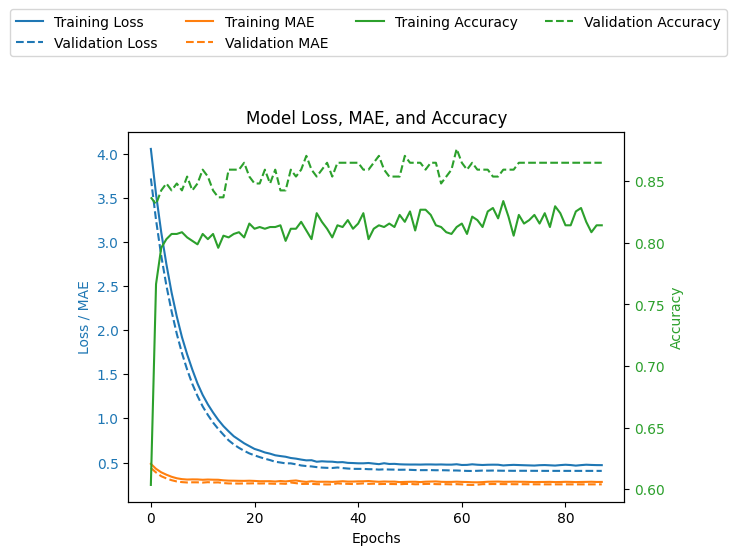

In [7]:
fig, ax1 = plt.subplots()

# Plot Loss on the primary y-axis
ax1.plot(history.history['loss'], label='Training Loss', color='tab:blue')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='tab:blue', linestyle="--")
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss / MAE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot MAE on the primary y-axis
ax1.plot(history.history['mae'], label='Training MAE', color='tab:orange')
ax1.plot(history.history['val_mae'], label='Validation MAE', color='tab:orange', linestyle="--")

# Create a secondary y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='tab:green')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:green', linestyle="--")
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add legends for clarity
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.title("Model Loss, MAE, and Accuracy")
plt.show()

## Improvement Points:
- Find better data features
- Optimise weights to prevent overfitting
- Experiment more with model hyperparameters
- Create second neural network to predict age instead of median
- Feature engineering to get more relevant and closely-related features instead of broad and globally available ones
- Look more into empty data to get better correlations

> Thank you looking at my Notebook! ðŸ˜„